In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-12-02 18:32:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-12-02 18:32:51 (19.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import walk_through_dir, unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2024-11-29 18:01:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   196MB/s    in 0.7s    

2024-11-29 18:01:40 (196 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
unzip_data("10_food_classes_1_percent.zip")

In [ ]:
import tensorflow as tf

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"
walk_through_dir(train_dir)

There are 10 directories and 0 images in '10_food_classes_10_percent/train/'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.


In [ ]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir,image_size=IMAGE_SIZE,
                                                                         label_mode='categorical')
test_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(test_dir,image_size=IMAGE_SIZE,
                                                                         label_mode='categorical')

for images,labels in train_data_10_percent.take(3):
  print(images.shape)
  print(labels.shape)





Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.
(32, 224, 224, 3)
(32, 10)
(32, 224, 224, 3)
(32, 10)
(32, 224, 224, 3)
(32, 10)


In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.Resizing(224, 224),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomHeight(0.2),
  tf.keras.layers.RandomWidth(0.2),
  tf.keras.layers.RandomZoom(0.2)],
  #tf.keras.layers.experimental.preprocessing.Rescaling(1./255),]
  name="data_augmentation"
)


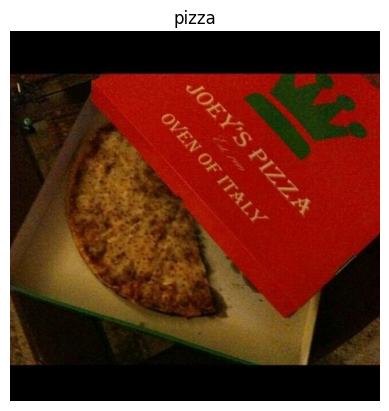

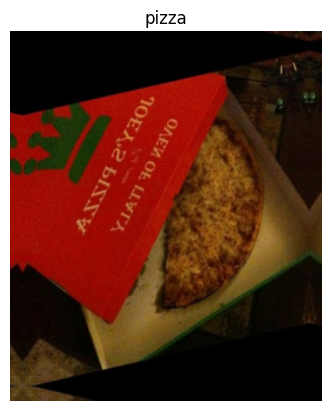

In [ ]:
#Visualize data augmentation layer
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

target_class=random.choice(train_data_1_percent.class_names)
target_dir=train_dir+target_class
img_path=random.choice(os.listdir(target_dir))
img_path=target_dir+"/"+img_path
img=mpimg.imread(img_path)

augmented_img=data_augmentation(tf.expand_dims(img,axis=0))

def show_random_image(img) :
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  plt.show()

show_random_image(img)
show_random_image(tf.squeeze(augmented_img/255.))



In [ ]:
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False
inputs=tf.keras.layers.Input(shape=(224,224,3),name="input_layer")
x=data_augmentation(inputs)
#x = tf.keras.layers.Resizing(224, 224)(x)
x=base_model(x,training=False)
x=tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs=tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)
model_1=tf.keras.Model(inputs,outputs)
model_1.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model_1.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augmentation (Sequential)       │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, None, None, 1280)    │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling_layer         │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,062,381 (15.50 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
train_data_10_percent=train_data_10_percent.prefetch(buffer_size=32).repeat()



In [ ]:
history_1=model_1.fit(train_data_1_percent,
                      epochs=5,
                      steps_per_epoch=3,
                      validation_data=test_data_1_percent,
                      validation_steps=int(0.25*len(test_data_1_percent)),
                      callbacks=[create_tensorboard_callback(dir_name="transfer_learning",experiment_name="1_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20241129-182522
Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 826ms/step - accuracy: 0.8583 - loss: 1.2502 - val_accuracy: 0.4819 - val_loss: 1.6739
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 761ms/step - accuracy: 0.7607 - loss: 1.2888 - val_accuracy: 0.5099 - val_loss: 1.6603
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 777ms/step - accuracy: 0.8576 - loss: 1.1784 - val_accuracy: 0.5230 - val_loss: 1.6026
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 950ms/step - accuracy: 0.9220 - loss: 1.0401 - val_accuracy: 0.5444 - val_loss: 1.4806
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step - accuracy: 0.9402 - loss: 0.9585 - val_accuracy: 0.5147 - val_loss: 1.5902


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


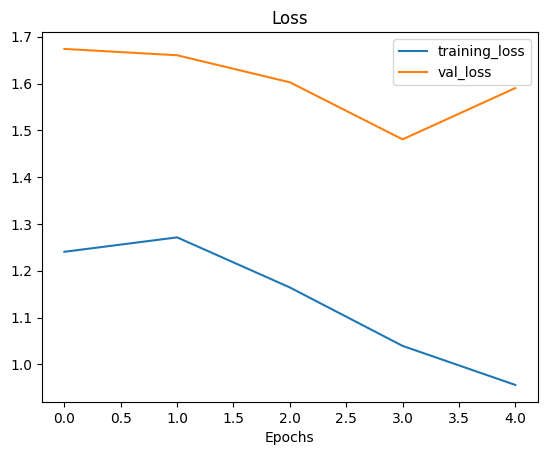

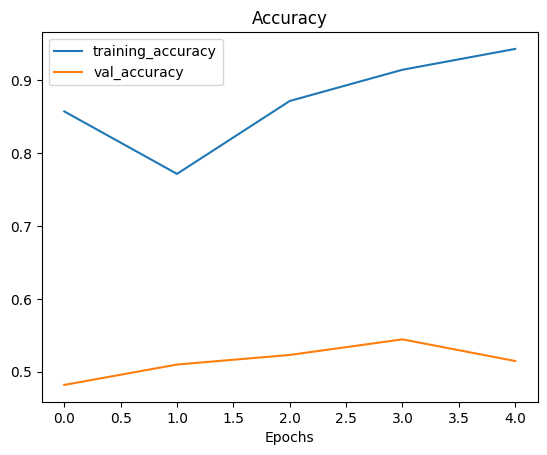

In [ ]:
plot_loss_curves(history_1)

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2024-12-01 17:37:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 2607:f8b0:4023:c06::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   159MB/s    in 1.0s    

2024-12-01 17:37:31 (159 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
unzip_data("10_food_classes_10_percent.zip")

In [ ]:
import tensorflow as tf

inputs=tf.keras.layers.Input(shape=(224,224,3),name="input_layer")
x=data_augmentation(inputs)
#x = tf.keras.layers.Resizing(224, 224)(x)
x=base_model(x,training=False)
x=tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs=tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)
model_2=tf.keras.Model(inputs,outputs)
model_2.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model_2.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augmentation (Sequential)       │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, None, None, 1280)    │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling_layer         │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,062,381 (15.50 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
checkpoint_path= "10_percent_model_checkpoint/checkpoint.weights.h5"
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                       save_weights_only=True,
                                                       save_best_only=False,
                                                       save_freq="epoch",
                                                       verbose=1)


In [ ]:
history_2=model_2.fit(train_data_10_percent,
                      epochs=5,
                      steps_per_epoch=3,
                      validation_data=test_data_10_percent,
                      validation_steps=int(len(test_data_10_percent)),
                      callbacks=[create_tensorboard_callback(dir_name="transfer_learning",experiment_name="10_percent_data_aug"),
                      checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20241201-174124
Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.6042 - loss: 1.7133
Epoch 1: saving model to 10_percent_model_checkpoint/checkpoint.weights.h5
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.5938 - loss: 1.7211 - val_accuracy: 0.4580 - val_loss: 1.7537
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.4965 - loss: 1.7411
Epoch 2: saving model to 10_percent_model_checkpoint/checkpoint.weights.h5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 293ms/step - accuracy: 0.4792 - loss: 1.7477
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.4792 - loss: 1.8024
Epoch 3: saving model to 10_percent_model_checkpoint/checkpoint.weights.h5
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.4844 - loss: 1.8025 - val_accuracy: 0.5312 - val_loss: 1.5987
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.5295 - loss: 1.6306
Epoch 4: saving model to 10_percent_model_checkpoint/checkpo

In [ ]:
model_2.evaluate(test_data_10_percent)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.6025 - loss: 1.4543


[1.4552592039108276, 0.6055999994277954]

In [ ]:
model_2.load_weights(checkpoint_path)
model_2.evaluate(test_data_10_percent)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.5993 - loss: 1.4573


[1.4552589654922485, 0.6055999994277954]

In [ ]:
model_2.layers

[<InputLayer name=input_layer, built=True>,
 <Sequential name=data_augmentation, built=True>,
 <Functional name=efficientnetb0, built=True>,
 <GlobalAveragePooling2D name=global_average_pooling_layer, built=True>,
 <Dense name=output_layer, built=True>]

In [ ]:
for layers in model_2.layers :
  print(layers,layers.trainable)

<InputLayer name=input_layer, built=True> True
<Sequential name=data_augmentation, built=True> True
<Functional name=efficientnetb0, built=True> False
<GlobalAveragePooling2D name=global_average_pooling_layer, built=True> True
<Dense name=output_layer, built=True> True


In [ ]:
for i,layer in enumerate(model_2.layers[2].layers) :
  print(i,layer.name,layer.trainable)

0 input_layer False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [ ]:
base_model.trainable=True
for layer in base_model.layers[:-10] :
  layer.trainable=False



In [ ]:
model_2.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),metrics=["accuracy"])

In [ ]:
model_2.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augmentation (Sequential)       │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, None, None, 1280)    │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling_layer         │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,062,381 (15.50 MB)

 Trainable params: 906,042 (3.46 MB)

 Non-trainable params: 3,156,339 (12.04 MB)

In [ ]:
model_2.trainable_variables

[<KerasVariable shape=(1, 1, 1152, 48), dtype=float32, path=block7a_se_reduce/kernel>,
 <KerasVariable shape=(48,), dtype=float32, path=block7a_se_reduce/bias>,
 <KerasVariable shape=(1, 1, 48, 1152), dtype=float32, path=block7a_se_expand/kernel>,
 <KerasVariable shape=(1152,), dtype=float32, path=block7a_se_expand/bias>,
 <KerasVariable shape=(1, 1, 1152, 320), dtype=float32, path=block7a_project_conv/kernel>,
 <KerasVariable shape=(320,), dtype=float32, path=block7a_project_bn/gamma>,
 <KerasVariable shape=(320,), dtype=float32, path=block7a_project_bn/beta>,
 <KerasVariable shape=(1, 1, 320, 1280), dtype=float32, path=top_conv/kernel>,
 <KerasVariable shape=(1280,), dtype=float32, path=top_bn/gamma>,
 <KerasVariable shape=(1280,), dtype=float32, path=top_bn/beta>,
 <KerasVariable shape=(1280, 10), dtype=float32, path=output_layer/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=output_layer/bias>]

In [ ]:
fine_tune_epochs=5+5
history_finetune_10_percent=model_2.fit(train_data_10_percent,
                                          epochs=fine_tune_epochs,
                                          steps_per_epoch=3,
                                          validation_data=test_data_10_percent,
                                          validation_steps=int(0.25*len(test_data_10_percent)),
                                          initial_epoch=history_2.epoch[-1],
                                          callbacks=[create_tensorboard_callback(dir_name="transfer_learning",experiment_name="10_percent_data_aug_fine_tune"),
                                          checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug_fine_tune/20241201-180433
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 0.7257 - loss: 1.2359
Epoch 5: saving model to 10_percent_model_checkpoint/checkpoint.weights.h5
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.7292 - loss: 1.2380 - val_accuracy: 0.7122 - val_loss: 1.1884
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.6406 - loss: 1.3642
Epoch 6: saving model to 10_percent_model_checkpoint/checkpoint.weights.h5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 939ms/step - accuracy: 0.6445 - loss: 1.3506 - val_accuracy: 0.7155 - val_loss: 1.1580
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.7240 - loss: 1.2944
Epoch 7: saving model to 10_percent_model_checkpoint/checkpoint.weights.h5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 938ms/step - accuracy: 0.7305 - loss: 1.2818 - val_accuracy: 0.7286 - val_loss: 1.1227
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.6181 - loss: 1.3786
E

In [ ]:
result_finetune_10_percent=model_2.evaluate(test_data_10_percent)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.7488 - loss: 1.0205


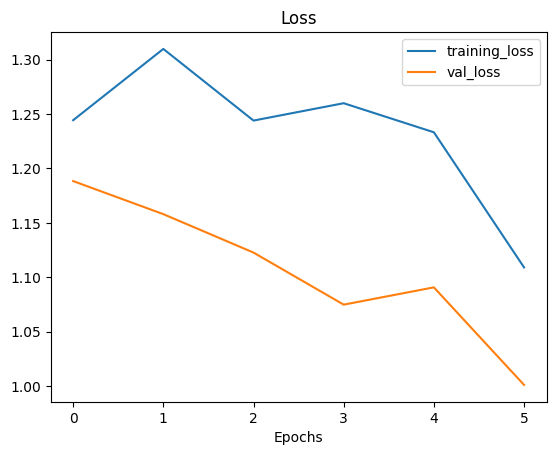

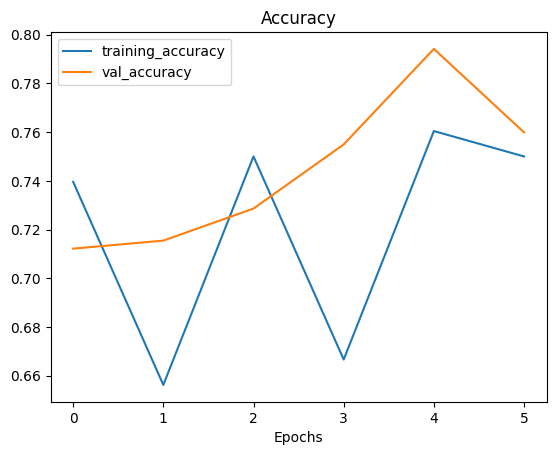

In [ ]:
plot_loss_curves(history_finetune_10_percent)

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2024-12-01 18:11:59--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  37.5MB/s    in 13s     

2024-12-01 18:12:12 (39.3 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
unzip_data("10_food_classes_all_data.zip")

In [ ]:
train_dir_10_all_data="10_food_classes_all_data/train/"
test_dir_10_all_data="10_food_classes_all_data/test/"

walk_through_dir("10_food_classes_all_data")


There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.

In [ ]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_10_all_data=tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_all_data,image_size=IMAGE_SIZE,
                                                                         label_mode='categorical')
test_data_10_all_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir_10_all_data,image_size=IMAGE_SIZE,
                                                                         label_mode='categorical')
len(train_data_10_all_data),len(test_data_10_all_data)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


(235, 79)

In [ ]:
train_data_10_all_data_repeat=train_data_10_all_data.prefetch(buffer_size=32).repeat()
test_data_10_all_data_repeat=test_data_10_all_data.prefetch(buffer_size=32).repeat()


In [ ]:
model_2.evaluate(test_data_10_all_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.7365 - loss: 1.0357


[1.0225253105163574, 0.7480000257492065]

In [ ]:
result_finetune_10_percent

[1.022525668144226, 0.7480000257492065]

In [ ]:
model_2.load_weights(checkpoint_path)

In [ ]:
model_2.evaluate(test_data_10_all_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.7434 - loss: 1.0327


[1.0225253105163574, 0.7480000257492065]

In [ ]:
fine_tune_epochs=5+5
history_finetune_10_percent_all_data=model_2.fit(train_data_10_all_data_repeat,
                                          epochs=fine_tune_epochs,
                                          steps_per_epoch=235,
                                          validation_data=test_data_10_all_data_repeat,
                                          validation_steps=79,
                                          initial_epoch=history_2.epoch[-1],
                                          callbacks=[create_tensorboard_callback(dir_name="transfer_learning",experiment_name="10_percent_data_aug_fine_tune_all_data")
                                          ])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug_fine_tune_all_data/20241201-183643
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 174ms/step - accuracy: 0.8093 - loss: 0.6355 - val_accuracy: 0.8916 - val_loss: 0.3332
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 170ms/step - accuracy: 0.8318 - loss: 0.5514 - val_accuracy: 0.8972 - val_loss: 0.3089
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 169ms/step - accuracy: 0.8439 - loss: 0.4978 - val_accuracy: 0.9044 - val_loss: 0.2913
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 39s 167ms/step - accuracy: 0.8647 - loss: 0.4553 - val_accuracy: 0.9020 - val_loss: 0.2831
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 38s 160ms/step - accuracy: 0.8625 - loss: 0.4377 - val_accuracy: 0.9128 - val_loss: 0.2656
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 37s 157ms/step - accuracy: 0.8771 - loss: 0.3993 - val_accuracy: 0.9120 - val_loss: 0.2623
